# [0] Problem Define

## 국제유가 예측

### y=f(x)

#### Y = 국제휘발유(95RONS)

#### X = 'GPR',
 ####   '1개월 전 Dollar Index', 
 ####        '2개월전 미국 수입석유 물가지수',  
  ####       '다우존스 산업 지수',  
   ####      '미국 기준 금리', 
   ####    'Brent유 선물 가격',
   ####    'S&P 500'

# [1]: Libraries Setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

#  [2]: Data Collection

## [2.1]: 사용할 데이터 셋을 가져옵니다: 국제유가 관련 데이터

In [2]:
xlsx = pd.read_excel("머신러닝기반데이터분석(02)_4팀data_김세인, 백다은,한명은.xlsx")
xlsx.to_csv("머신러닝기반데이터분석(02)_4팀data_김세인, 백다은,한명은.csv")

df=pd.read_csv("머신러닝기반데이터분석(02)_4팀data_김세인, 백다은,한명은.csv")

In [3]:
df.head()

,Unnamed: 0,Column1,연월,국제 휘발유(95RON),두바이유,1개월 전 두바이유,GPR,1개월 전 GPR,Dollar Index,2개월 전 Dollar index,2개월 전 미국 소비자물가지수 (CPI),미국 수입석유 물가지수,1개월전 미국 수입석유 물가지수,다우존스 산업 지수,나스닥 100,나스닥 종합지수,미국 기준 금리,WTI 선물 가격,Brent유 선물 가격,S&P 500
0,0,0,`08.07,866.309960,840.3,830.0,89.7,87.5,72.796522,72.80000,210.18,465.0,450.3,22926.0,1831.0,2278.1,2.0,124.08,123.98,1267.38
1,1,1,`08.08,759.812195,742.7,840.3,88.6,89.7,76.209524,73.37452,210.04,419.5,465.0,22926.0,1818.4,2280.7,2.0,115.46,114.05,1282.83
2,2,2,`08.09,763.632092,686.2,742.7,88.5,88.6,78.319091,72.79652,211.08,371.5,419.5,22926.0,1710.0,2205.2,1.8,100.64,98.17,1166.36
3,3,3,`08.10,658.460149,509.7,686.2,64.2,88.5,83.492391,76.20952,211.69,288.9,371.5,22926.0,1328.6,1730.3,1.0,67.81,65.32,968.75
4,4,4,`08.11,422.491319,436.3,509.7,79.1,64.2,86.769750,78.31909,213.53,201.6,288.9,22926.0,1139.1,1465.6,0.4,54.43,53.49,896.24


## [2.2]:  데이터에서 변수의 의미를 살펴봅니다: Features(Columns/Attributes/Xs) Descriptions

In [4]:
# 파일 변환 과정에서 추가된 row삭제
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['Column1'], axis = 1, inplace = True)

In [5]:
### 그래프의 배경 설정 : sns --> seaborn 라이브러리 이용
sns.set_style('darkgrid')

## [3.1]: 데이터셋 기본 정보를 파악합니다.

In [6]:
df.shape

(174, 18)

In [7]:
df.isnull().sum()

연월                        0
국제 휘발유(95RON)             0
두바이유                      0
1개월 전 두바이유                0
GPR                       0
1개월 전 GPR                 0
Dollar Index              0
2개월 전 Dollar index        0
2개월 전 미국 소비자물가지수 (CPI)    0
미국 수입석유 물가지수              0
1개월전 미국 수입석유 물가지수         0
다우존스 산업 지수                0
나스닥 100                   0
나스닥 종합지수                  0
미국 기준 금리                  0
WTI 선물 가격                 0
Brent유 선물 가격              0
S&P 500                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   연월                      174 non-null    object 
 1   국제 휘발유(95RON)           174 non-null    float64
 2   두바이유                    174 non-null    float64
 3   1개월 전 두바이유              174 non-null    float64
 4   GPR                     174 non-null    float64
 5   1개월 전 GPR               174 non-null    float64
 6   Dollar Index            174 non-null    float64
 7   2개월 전 Dollar index      174 non-null    float64
 8   2개월 전 미국 소비자물가지수 (CPI)  174 non-null    float64
 9   미국 수입석유 물가지수            174 non-null    float64
 10  1개월전 미국 수입석유 물가지수       174 non-null    float64
 11  다우존스 산업 지수              174 non-null    float64
 12  나스닥 100                 174 non-null    float64
 13  나스닥 종합지수                174 non-null    float64
 14  미국 기준 금리                174 non-null    fl

## [3.2]: 종속 변수(목표 변수) 탐색
종속변수(타겟변수, y)를 설정합니다.

In [9]:
### [기초 통계량]: 종속변수의 기초통계량을 살펴봅니다.
df['국제 휘발유(95RON)'].describe()

count     174.000000
mean      627.808445
std       189.950607
min       157.831793
25%       491.985423
50%       595.248882
75%       795.060061
max      1247.932087
Name: 국제 휘발유(95RON), dtype: float64

<AxesSubplot:>

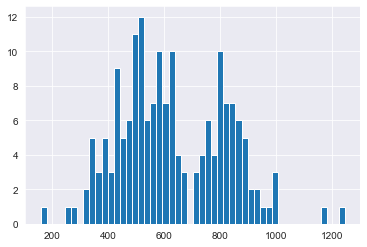

In [10]:
df['국제 휘발유(95RON)'].hist(bins=50)

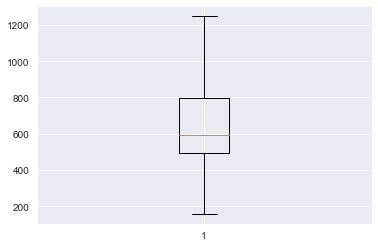

In [11]:
plt.boxplot(df['국제 휘발유(95RON)'])
plt.show()

## [3-3] 설명변수(독립변수, features, attributes, x) 살펴보기

In [12]:
import matplotlib.font_manager as fm
from matplotlib import rc

#font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
#font = fm.FontProperties(fname=font_path).get_name()
#rc('font', family=font)
rc('axes', unicode_minus=False)

/var/folders/36/vptbtyhx79z5lc47hqfhs_3m0000gp/T/ipykernel_1144/1294623085.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from curr

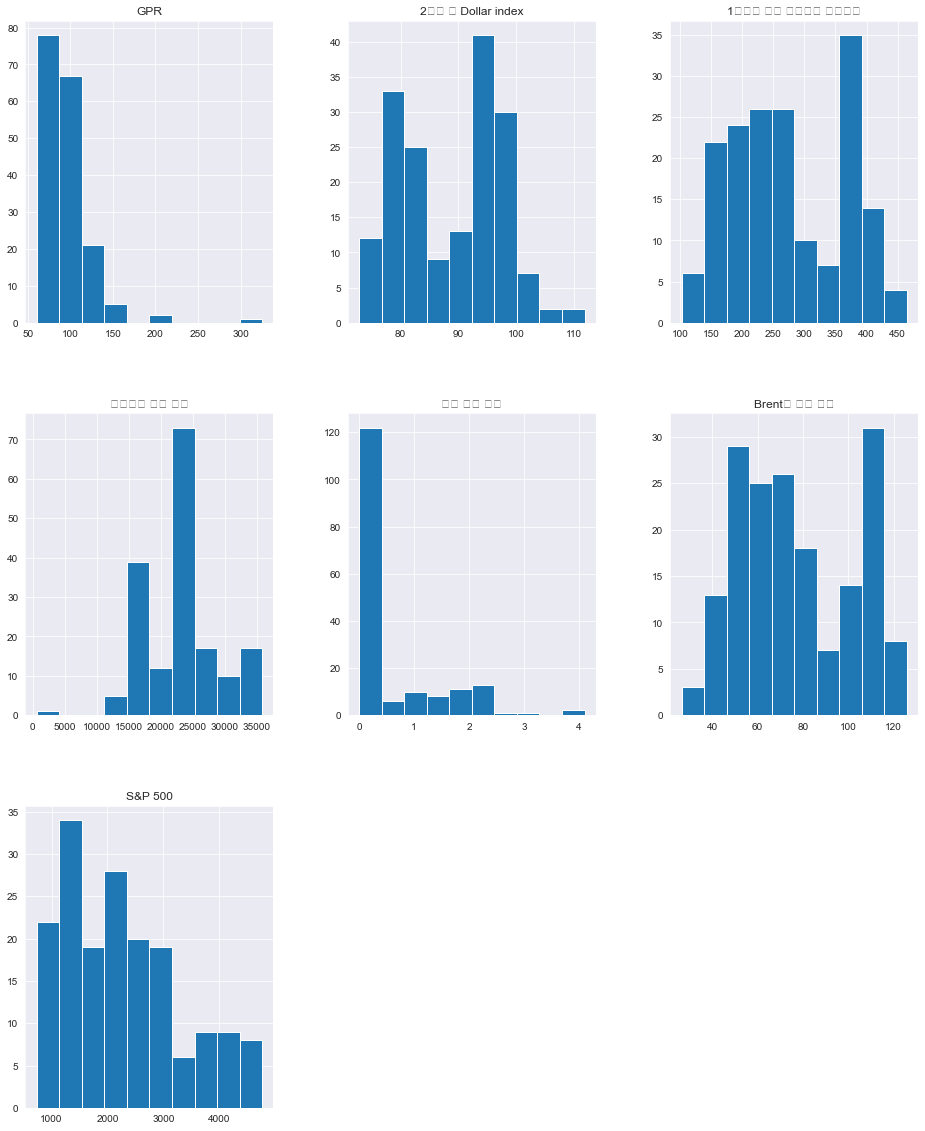

In [13]:
numerical_columns=['GPR', '2개월 전 Dollar index','1개월전 미국 수입석유 물가지수',
                   '다우존스 산업 지수', '미국 기준 금리','Brent유 선물 가격','S&P 500']

fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성
df[numerical_columns].hist(ax=ax)
plt.show()

## [3-4] 설명변수(x) 와 종속변수(y) 간의 관계 탐색
- 변수간의 상관관계 파악해 봅니다. 

In [14]:
cols = ['국제 휘발유(95RON)', 'GPR', '2개월 전 Dollar index','1개월전 미국 수입석유 물가지수',
                   '다우존스 산업 지수', '미국 기준 금리','Brent유 선물 가격','S&P 500']

corr = df[cols].corr(method = 'pearson')
corr

,국제 휘발유(95RON),GPR,2개월 전 Dollar index,1개월전 미국 수입석유 물가지수,다우존스 산업 지수,미국 기준 금리,Brent유 선물 가격,S&P 500
국제 휘발유(95RON),1.000000,0.230116,-0.440611,0.913881,0.049593,-0.039862,0.933411,-0.115788
GPR,0.230116,1.000000,0.301409,0.102138,0.206217,0.157160,0.094600,0.332754
2개월 전 Dollar index,-0.440611,0.301409,1.000000,-0.560527,0.341956,0.491889,-0.611873,0.708006
1개월전 미국 수입석유 물가지수,0.913881,0.102138,-0.560527,1.000000,-0.019835,-0.022017,0.926359,-0.176024
다우존스 산업 지수,0.049593,0.206217,0.341956,-0.019835,1.000000,0.318490,-0.068065,0.685498
미국 기준 금리,-0.039862,0.157160,0.491889,-0.022017,0.318490,1.000000,-0.111157,0.347120
Brent유 선물 가격,0.933411,0.094600,-0.611873,0.926359,-0.068065,-0.111157,1.000000,-0.228502
S&P 500,-0.115788,0.332754,0.708006,-0.176024,0.685498,0.347120,-0.228502,1.000000


/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.draw()
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.draw()
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 55064 (\N{HANGUL SYLLABLE HWI}) missing from current font.
  fig.canvas.draw()
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.draw()
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.draw()
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE

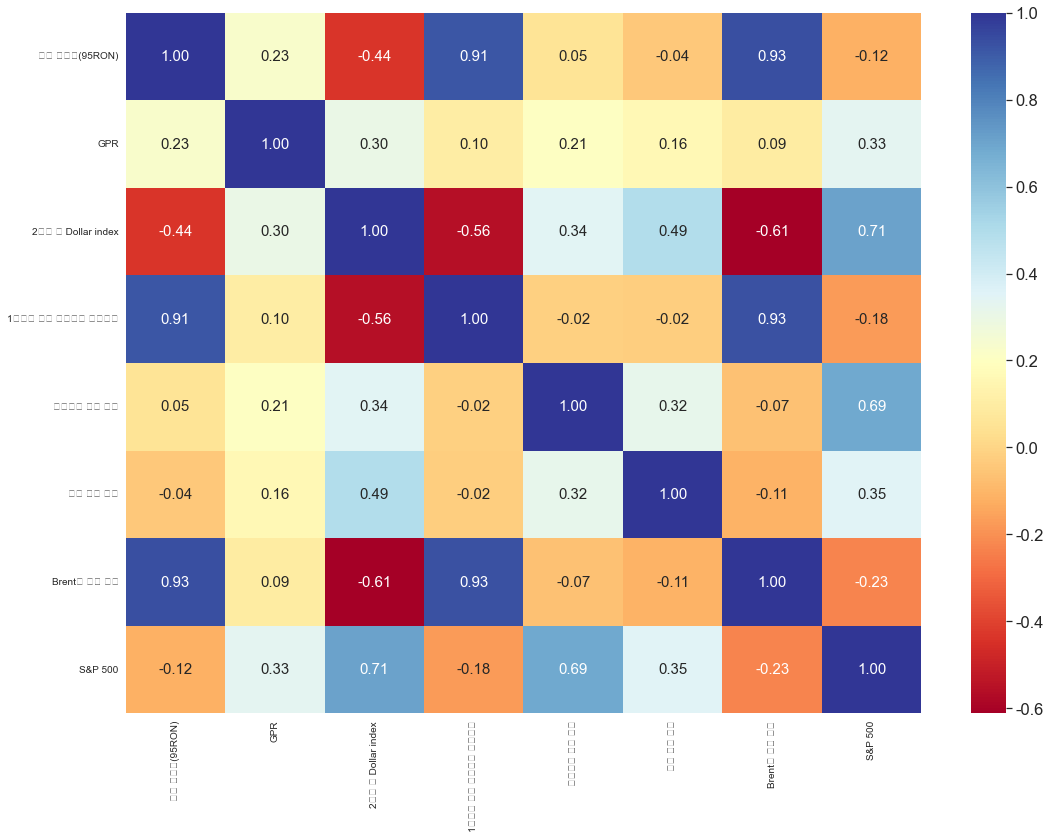

In [15]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout() 
plt.show()

### [3-4-1] 설명변수(x) 와 종속변수(y) 간의 관계 탐색 

In [16]:
import matplotlib.font_manager as fm
from matplotlib import rc

#font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
#font = fm.FontProperties(fname=font_path).get_name()
#rc('font', family=font)
rc('axes', unicode_minus=False)

/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current fo

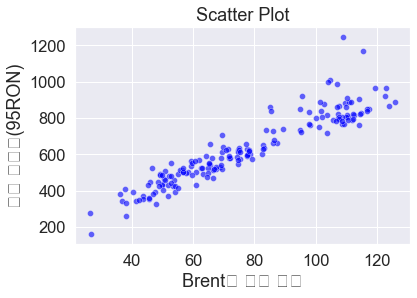

In [17]:
sns.scatterplot(data=df, x='Brent유 선물 가격', y='국제 휘발유(95RON)', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current fo

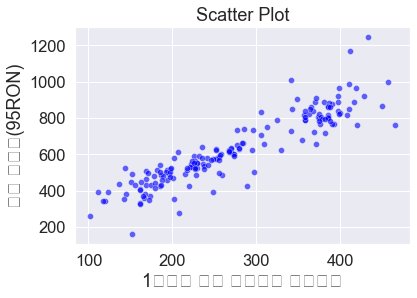

In [18]:
sns.scatterplot(data=df, x='1개월전 미국 수입석유 물가지수', y='국제 휘발유(95RON)', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/monggni/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current fo

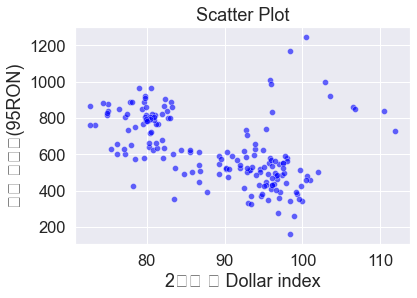

In [19]:
sns.scatterplot(data=df, x='2개월 전 Dollar index', y='국제 휘발유(95RON)', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

# [4]: Modeling: 국제 유가 예측 모델링 with Regression

In [20]:
df.head()

,연월,국제 휘발유(95RON),두바이유,1개월 전 두바이유,GPR,1개월 전 GPR,Dollar Index,2개월 전 Dollar index,2개월 전 미국 소비자물가지수 (CPI),미국 수입석유 물가지수,1개월전 미국 수입석유 물가지수,다우존스 산업 지수,나스닥 100,나스닥 종합지수,미국 기준 금리,WTI 선물 가격,Brent유 선물 가격,S&P 500
0,`08.07,866.309960,840.3,830.0,89.7,87.5,72.796522,72.80000,210.18,465.0,450.3,22926.0,1831.0,2278.1,2.0,124.08,123.98,1267.38
1,`08.08,759.812195,742.7,840.3,88.6,89.7,76.209524,73.37452,210.04,419.5,465.0,22926.0,1818.4,2280.7,2.0,115.46,114.05,1282.83
2,`08.09,763.632092,686.2,742.7,88.5,88.6,78.319091,72.79652,211.08,371.5,419.5,22926.0,1710.0,2205.2,1.8,100.64,98.17,1166.36
3,`08.10,658.460149,509.7,686.2,64.2,88.5,83.492391,76.20952,211.69,288.9,371.5,22926.0,1328.6,1730.3,1.0,67.81,65.32,968.75
4,`08.11,422.491319,436.3,509.7,79.1,64.2,86.769750,78.31909,213.53,201.6,288.9,22926.0,1139.1,1465.6,0.4,54.43,53.49,896.24


##  [4-1]: 데이터 전처리

In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scale_columns=['GPR', '2개월 전 Dollar index','1개월전 미국 수입석유 물가지수',
                   '다우존스 산업 지수', '미국 기준 금리','Brent유 선물 가격','S&P 500']
df[scale_columns]=scaler.fit_transform(df[scale_columns])

In [22]:
df.head()

,연월,국제 휘발유(95RON),두바이유,1개월 전 두바이유,GPR,1개월 전 GPR,Dollar Index,2개월 전 Dollar index,2개월 전 미국 소비자물가지수 (CPI),미국 수입석유 물가지수,1개월전 미국 수입석유 물가지수,다우존스 산업 지수,나스닥 100,나스닥 종합지수,미국 기준 금리,WTI 선물 가격,Brent유 선물 가격,S&P 500
0,`08.07,866.309960,840.3,830.0,-0.208304,87.5,72.796522,-1.843703,210.18,465.0,1.939058,-0.000064,1831.0,2278.1,1.634798,124.08,1.859555,-0.963567
1,`08.08,759.812195,742.7,840.3,-0.246417,89.7,76.209524,-1.778078,210.04,419.5,2.100925,-0.000064,1818.4,2280.7,1.634798,115.46,1.465382,-0.948555
2,`08.09,763.632092,686.2,742.7,-0.249881,88.6,78.319091,-1.844101,211.08,371.5,1.599909,-0.000064,1710.0,2205.2,1.396261,100.64,0.835022,-1.061724
3,`08.10,658.460149,509.7,686.2,-1.091819,88.5,83.492391,-1.454247,211.69,288.9,1.071365,-0.000064,1328.6,1730.3,0.442115,67.81,-0.468964,-1.253734
4,`08.11,422.491319,436.3,509.7,-0.575569,64.2,86.769750,-1.213279,213.53,201.6,0.161829,-0.000064,1139.1,1465.6,-0.273495,54.43,-0.938558,-1.324189


In [23]:
df[scale_columns].head()

,GPR,2개월 전 Dollar index,1개월전 미국 수입석유 물가지수,다우존스 산업 지수,미국 기준 금리,Brent유 선물 가격,S&P 500
0,-0.208304,-1.843703,1.939058,-0.000064,1.634798,1.859555,-0.963567
1,-0.246417,-1.778078,2.100925,-0.000064,1.634798,1.465382,-0.948555
2,-0.249881,-1.844101,1.599909,-0.000064,1.396261,0.835022,-1.061724
3,-1.091819,-1.454247,1.071365,-0.000064,0.442115,-0.468964,-1.253734
4,-0.575569,-1.213279,0.161829,-0.000064,-0.273495,-0.938558,-1.324189


In [24]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df[numerical_columns]
y = df['국제 휘발유(95RON)']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape,y_train.shape

((139, 7), (139,))

In [26]:
X_test.shape,y_test.shape

((35, 7), (35,))

In [27]:
y_train

118    592.913688
142    258.809608
163    834.451961
38     874.989632
139    484.145009
          ...    
71     792.643604
106    457.348320
14     577.301370
92     392.630803
102    515.693499
Name: 국제 휘발유(95RON), Length: 139, dtype: float64

In [28]:
X_train

,GPR,2개월 전 Dollar index,1개월전 미국 수입석유 물가지수,다우존스 산업 지수,미국 기준 금리,Brent유 선물 가격,S&P 500
118,1.039012,0.039566,-0.473525,0.293339,1.276993,0.016905,0.433573
142,-0.942834,1.145493,-1.892887,0.033669,-0.631299,-1.559788,0.763005
163,4.275103,0.823230,0.346819,2.088859,-0.631299,0.827083,2.054807
38,-0.426584,-1.590758,1.275075,-0.000064,-0.631299,1.017223,-1.095674
139,-0.682977,0.893434,-0.509863,0.742611,1.157725,-1.090194,0.675468
...,...,...,...,...,...,...,...
71,0.106990,-1.027492,1.181478,-1.083898,-0.631299,1.386785,-0.290352
106,0.238651,1.322171,-0.958024,-0.354535,0.322847,-1.046926,0.148420
14,-0.100896,-1.054897,-0.225770,-0.000064,-0.631299,-0.320107,-1.167907
92,0.484649,1.167117,-1.794886,-1.002230,-0.273495,-1.460947,-0.193662


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#위는 다중공산성을 구하기 위한 문장임
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,GPR,1.3
1,2개월 전 Dollar index,5.8
2,1개월전 미국 수입석유 물가지수,8.3
3,다우존스 산업 지수,2.4
4,미국 기준 금리,1.9
5,Brent유 선물 가격,8.3
6,S&P 500,4.4


## [4-2]: 회귀모델링
1.  먼저 Training set에서 선형 회귀 예측 모델을 학습합니다.
2.  그 다음 도출된 모델을 Test set에 적용해 주택 가격“국제휘발유(95RON)"을 예측합니다. 
3.  이 결과는 실제 “국제휘발유(95RON)" 값과 비교하여 모델의 예측 성능을 평가하는 데 활용하게 됩니다.


In [30]:
from sklearn import linear_model 

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train) #추세선 만듬

# predict in test set
pred_test = lr.predict(X_test) 


# # 라쏘 예측모델 구현
# from sklearn import linear_model

# # fit Regression Model in training set
# lr = linear_model.Lasso(alpha=0.1)
# model = lr.fit(X_train, y_train)

# # predict in test set
# pred_test= lr.predict(X_test)



# # 릿지 예측모델 구현
# from sklearn import linear_model

# # fit Regression Model in training set
# lr = linear_model.Ridge(alpha=10)
# model = lr.fit(X_train, y_train)

# # predict in test set
# pred_test= lr.predict(X_test)




## [4-3]:모델해석하기
- 각 feature(설명변수, x) 컬럼에 대한 회귀계수를 확인해 보겠습니다. 

In [31]:
print(lr.coef_) #coef는 선형회귀 식에서 a ,기울기, 영향,

[ 12.53116271  74.31844821  80.29055993  33.54600395 -22.62565272
 131.06553456 -48.39456247]


In [32]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
#zip 은 묶는것 df[numerical_columns].columns 와  lr.coef_ 를 묶음
coefs

,feature,coefficients
0,GPR,12.531163
1,2개월 전 Dollar index,74.318448
2,1개월전 미국 수입석유 물가지수,80.290560
3,다우존스 산업 지수,33.546004
4,미국 기준 금리,-22.625653
5,Brent유 선물 가격,131.065535
6,S&P 500,-48.394562


In [33]:
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index) #abs는 절대값! (마이너스와 플러스 모두 중요)
coefs_new

,feature,coefficients
5,Brent유 선물 가격,131.065535
2,1개월전 미국 수입석유 물가지수,80.290560
1,2개월 전 Dollar index,74.318448
6,S&P 500,-48.394562
3,다우존스 산업 지수,33.546004
4,미국 기준 금리,-22.625653
0,GPR,12.531163


In [34]:
# import matplotlib.font_manager as fm
# from matplotlib import rc

# font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
# font = fm.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
# rc('axes', unicode_minus=False)

In [35]:
# ### coefficients 를 시각화 합니다. 

# ### figure size
# plt.figure(figsize = (8, 8))

# ### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그릴 수 있습니다. 
# plt.barh(coefs_new['feature'], coefs_new['coefficients']) #bar 히스토그램,
# plt.title('"feature - coefficient" Graph')
# plt.xlabel('coefficients')
# plt.ylabel('features')
# plt.show()

# [4-3] : 모델 해설

## [4-3-1: 유의성 검정] 을 합니다. 통계에서 변수가 유의하다는 의미입니다.

In [36]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          국제 휘발유(95RON)   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     290.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.61e-76
Time:                        17:33:21   Log-Likelihood:                -730.44
No. Observations:                 139   AIC:                             1477.
Df Residuals:                     131   BIC:                             1500.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                625.9660      4.073    153.705      0.000     617.910     634.022
GPR                   12.5312      4.400      2.848      0.005       3.827      21.235
2개월 전 Dollar index    74.3184      9.608      7.735      0.000      55.311      93.326
1개월전 미국 수입석유 물가지수     80.2906     11.352      7.073      0.000      57.834     102.747
다우존스 산업 지수            33.5460      6.027      5.566      0.000      21.624      45.468
미국 기준 금리             -22.6257      5.370     -4.213      0.000     -33.249     -12.003
Brent유 선물 가격         131.0655     11.582     11.316      0.000     108.154     153.977
S&P 500              -48.3946      8.411     -5.754      0.000     -65.033     -31.756
==============================================================================
Omnibus:                       40.191   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.346
Skew:                           0.963   Prob(JB):                     6.80e-35
Kurtosis:                       7.843   Cond. No.                         6.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X_train2

,const,GPR,2개월 전 Dollar index,1개월전 미국 수입석유 물가지수,다우존스 산업 지수,미국 기준 금리,Brent유 선물 가격,S&P 500
118,1.0,1.039012,0.039566,-0.473525,0.293339,1.276993,0.016905,0.433573
142,1.0,-0.942834,1.145493,-1.892887,0.033669,-0.631299,-1.559788,0.763005
163,1.0,4.275103,0.823230,0.346819,2.088859,-0.631299,0.827083,2.054807
38,1.0,-0.426584,-1.590758,1.275075,-0.000064,-0.631299,1.017223,-1.095674
139,1.0,-0.682977,0.893434,-0.509863,0.742611,1.157725,-1.090194,0.675468
...,...,...,...,...,...,...,...,...
71,1.0,0.106990,-1.027492,1.181478,-1.083898,-0.631299,1.386785,-0.290352
106,1.0,0.238651,1.322171,-0.958024,-0.354535,0.322847,-1.046926,0.148420
14,1.0,-0.100896,-1.054897,-0.225770,-0.000064,-0.631299,-0.320107,-1.167907
92,1.0,0.484649,1.167117,-1.794886,-1.002230,-0.273495,-1.460947,-0.193662


## [4-3-2: 해설] coefficient, p-value, R-square

- coeff를 봐야 합니다.
- P>|t|를 봐야 합니다. p-value를 의미합니다. 0.05 보다 작아야 유의합니다.
- R-square 를 봐야 합니다. 설명력을 의미합니다.

# [4-4] : 모델 해설모델 에측 결과 및 성능 평가
## [4-4-1] : 모델의 가시화(시각화)
- 예측 결과를 가시화 합니다. 
- 학습한 모델을 Test set에 적용하여 y값(“국제휘발유(95RON)”)을 예측합니다.
- 예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화해보겠습니다.

In [38]:
### 예측 결과 시각화 (test set)
df_coefs = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df_coefs = df_coefs.sort_values(by='actual').reset_index(drop=True)
df_coefs.head()

,actual,prediction
0,277.189024,347.262284
1,351.457442,399.989018
2,390.115544,469.760570
3,430.159099,459.061241
4,467.462625,509.764504


In [39]:
df_coefs_sorted = df_coefs.sort_values(by='actual', ascending=True)
df_coefs_sorted = df_coefs_sorted.reset_index()
df_coefs_sorted.head(3)

,index,actual,prediction
0,0,277.189024,347.262284
1,1,351.457442,399.989018
2,2,390.115544,469.760570


In [40]:
df_check = pd.DataFrame(abs(df_coefs['prediction'] - df_coefs['actual']), columns=['실제값 예측값 차이'])
df_check = pd.concat([df_coefs, df_check],axis=1)
df_check_sorted = df_check.sort_values(by='실제값 예측값 차이', ascending=False)
df_check_sorted.head(10)

,actual,prediction,실제값 예측값 차이
34,1169.589622,1012.513249,157.076373
32,908.503882,796.754545,111.749337
21,630.262500,545.434133,84.828366
2,390.115544,469.760570,79.645026
0,277.189024,347.262284,70.073260
29,861.889444,799.922899,61.966545
28,859.711085,801.308179,58.402906
7,505.826011,450.098673,55.727338
1,351.457442,399.989018,48.531576
10,524.068340,478.456113,45.612227


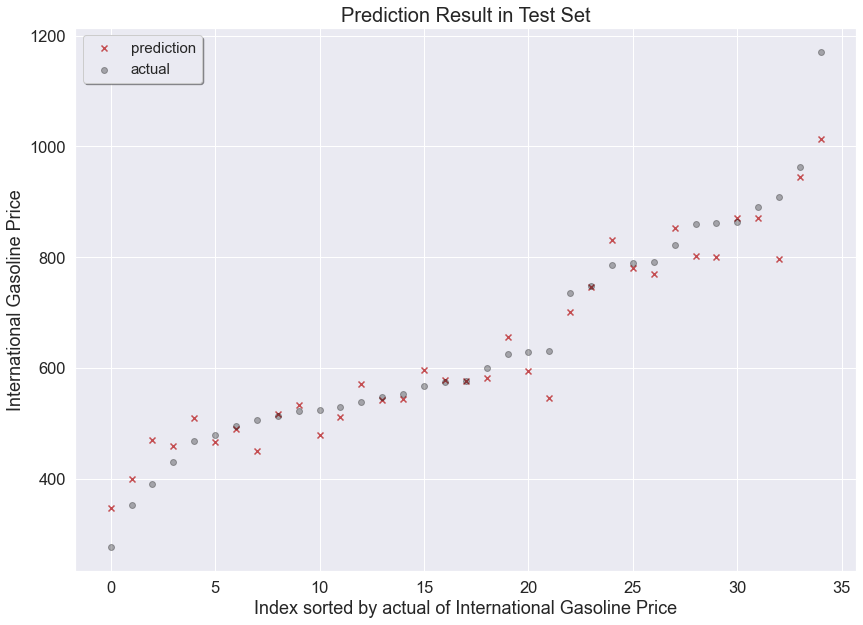

In [53]:
plt.figure(figsize=(14, 10))
plt.scatter(df_coefs.index, df_coefs['prediction'], marker='x', color='r')
plt.scatter(df_coefs.index, df_coefs['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.xlabel('Index sorted by actual of International Gasoline Price')
plt.ylabel('International Gasoline Price')
plt.legend(['prediction', 'actual'], fontsize=15, frameon=True, shadow=True )
plt.show()

In [42]:
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.9394565953588875
0.9357420837089468


In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

46.34247885333698
48.871187218048654


### 해설) Test set에서 해당 예측 모델의 R square가 0.93이고, RMSE가 41.7입니다.